# Summary tables that address models and open questions related to COVID-19

In [1]:
import numpy as np 
import pandas as pd 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt

In [3]:
# Geting the Table of Studies
articles=pd.read_csv('../metadata.csv', low_memory=False) 
articles.shape

(210537, 19)

In [4]:
# Cleaned the TABLE for readability
Art1= articles[['title','publish_time','journal','url','abstract','doi','cord_uid']]

# Make a copy to work with
Articles1=Art1.copy()

In [5]:
#separate each word in the column: abstract, for browsing
Articles1['words'] = Articles1.abstract.str.strip().str.split('[\W_]+')

#separate words in the abstract column and create a new column
Articles1 = Articles1[Articles1.words.str.len() > 0]
Articles1.head(3)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
0,Clinical features of culture-proven Mycoplasma...,2001-07-04,BMC Infect Dis,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,OBJECTIVE: This retrospective chart review des...,10.1186/1471-2334-1-6,ug7v899j,"[OBJECTIVE, This, retrospective, chart, review..."
1,Nitric oxide: a pro-inflammatory mediator in l...,2000-08-15,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Inflammatory diseases of the respiratory tract...,10.1186/rr14,02tnwd4m,"[Inflammatory, diseases, of, the, respiratory,..."
2,Surfactant protein-D and pulmonary host defense,2000-08-25,Respir Res,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,Surfactant protein-D (SP-D) participates in th...,10.1186/rr19,ejv2xln0,"[Surfactant, protein, D, SP, D, participates, ..."


In [6]:
# saving the Table (dataframe) above
Articles1.to_csv('Articles.csv') 

#### 1. Human immune response to COVID-19

In [9]:
##1 Human immune response to COVID-19
# TABLE OF abstracts related to COVID 
COVID=Articles1[Articles1['abstract'].str.contains('COVID')]
COVID.shape

(47272, 8)

In [10]:
# saving the dataframe above
COVID.to_csv('COVID_ArticleAbstracts.csv') 

In [11]:
# Looking among COVID articles for immune response
ImmResp=COVID[COVID['abstract'].str.contains('immune response')]
ImmResp.shape

(1259, 8)

In [12]:
Human=ImmResp[ImmResp['abstract'].str.contains('human')]
Human.shape

(288, 8)

In [13]:
Human.head(3)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
22218,Host Immune Response and Immunobiology of Huma...,2020-04-30,Coronavirus Disease 2019 (COVID-19),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,One of the most serious viral outbreaks of the...,10.1007/978-981-15-4814-7_5,bwxktvsz,"[One, of, the, most, serious, viral, outbreaks..."
28761,Clinical remission of a critically ill COVID-1...,2020-07-31,Medicine (Baltimore),https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,RATIONALE: The COVID-19 cases increased very f...,10.1097/md.0000000000021429,yodji3f4,"[RATIONALE, The, COVID, 19, cases, increased, ..."
28893,Lung microbiome and coronavirus disease 2019 (...,2020-08-05,Hum Microb J,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,Coronavirus disease 2019 (COVID-19) is a rapid...,10.1016/j.humic.2020.100073,xzlc1pni,"[Coronavirus, disease, 2019, COVID, 19, is, a,..."


In [14]:
# saving the TABLE above as a 
Human.to_csv('COVID_ArticleAbstracts_Human_Immune_Response.csv') 

#### 2. What is known about mutations of the virus?

In [16]:
Mutation=Articles1[Articles1['abstract'].str.contains('mutation')]
Mutation.shape

(3268, 8)

In [17]:
coronaMut=Mutation[Mutation['abstract'].str.contains('corona')]
coronaMut.shape

(1068, 8)

In [18]:
COVIDMut=Mutation[Mutation['abstract'].str.contains('COVID')]
COVIDMut.shape

(457, 8)

In [19]:
# saving the TABLE above as a 
COVIDMut.to_csv('COVID_ArticleAbstracts_COVID_mutation.csv') 

#### Word Cloud: About COVID mutation

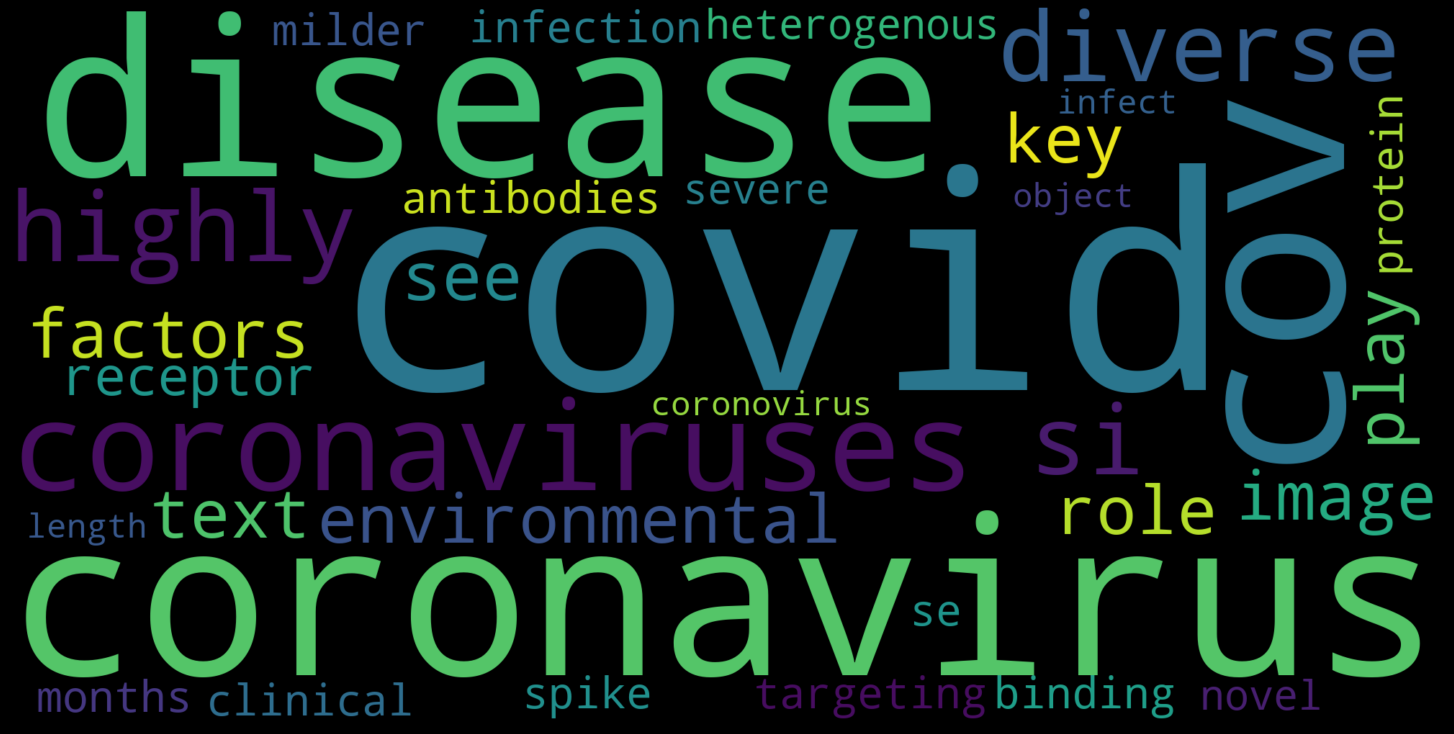

In [21]:
#to omit:
symbols1='!@#$%&*.,?"-'
ignoreThese=['background', 'abstract',
             'our','this','the',
             'objective','since', 'name',
            'word', 'words', 'and',
            'summary', 'study', 'dtype',
            'goal']

for char in symbols1:
        words1=COVIDMut['words'].replace(char,' ')
#lower case all words
words1=str(words1)
words1=words1.lower()

#ignore words
for item in ignoreThese:
        words1=words1.replace(item, ' ') 
        
wordcloud = WordCloud(
            width = 2000,
            height = 1000,
            background_color = 'black',
            stopwords = STOPWORDS).generate(words1)
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 3. Studies to monitor potential adaptations

In [22]:
Adapt=COVID[COVID['abstract'].str.contains('adaptation')]
Adapt.shape

(475, 8)

In [24]:
Adapt.head(3)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
10996,Practical Considerations When Performing Neuro...,2020-05-06,Neurodiagn J,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"The coronavirus disease 2019, SARS-COV-2 (the ...",10.1080/21646821.2020.1756132,72s8wpla,"[The, coronavirus, disease, 2019, SARS, COV, 2..."
26666,Organisational changes and challenges for infl...,2020-06-15,Frontline Gastroenterol,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,OBJECTIVE: To determine the challenges in diag...,10.1136/flgastro-2020-101520,pix0hmpj,"[OBJECTIVE, To, determine, the, challenges, in..."
27421,The impact of COVID‐19 on franchising in emerg...,2020-06-22,NaN,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7...,"The outbreak of COVID‐19, the disease caused b...",10.1002/joe.22053,0n7cidfw,"[The, outbreak, of, COVID, 19, the, disease, c..."


In [25]:
Adapt.to_csv('COVID_ArticleAbstracts_COVID_adaptation.csv')

#### 4. Are there studies about phenotypic change?

In [26]:
Pheno=Articles1[Articles1['abstract'].str.contains('phenotypic change')]
Pheno.shape

(26, 8)

In [27]:
Pheno2=COVID[COVID['abstract'].str.contains('phenotypic change')]
Pheno2.shape

(0, 8)

In [28]:
Pheno.to_csv('ArticleAbstracts_studies_on_phenotypic_change.csv')

#### 5. Changes in COVID-19 as the virus evolves.

In [29]:
Evo=COVID[COVID['abstract'].str.contains('evolve')]
Evo.shape

(648, 8)

In [30]:
#searching through those article abstracts with COVID term
VirEvo=COVID[COVID['abstract'].str.contains('virus evolve')]
VirEvo.shape

(1, 8)

In [31]:
VirEvo.head(3)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
125282,Flattening the curves: on-off lock-down strate...,2020-04-15,NaN,https://arxiv.org/pdf/2004.06916v1.pdf,The current COVID-19 pandemic is affecting dif...,NaN,zhcamsqa,"[The, current, COVID, 19, pandemic, is, affect..."


In [32]:
VirEvo.to_csv('ArticleAbstracts_COVID_virus_evolve.csv')

#### 6. Regional genetic variations (mutations) 

In [33]:
Genetic=COVID[COVID['abstract'].str.contains('genetic')]
Genetic.shape

(944, 8)

In [34]:
GeneticV=COVID[COVID['abstract'].str.contains('genetic variation')]
GeneticV.shape

(43, 8)

In [35]:
GeneticV.to_csv('ArticleAbstracts_COVID_genetic_variation.csv')

#### 7. What do models for transmission predict?

In [36]:
trans=COVID[COVID['abstract'].str.contains('transmission')]
trans.shape

(6043, 8)

In [37]:
models=trans[trans['abstract'].str.contains('model')]
models.shape

(1350, 8)

In [38]:
pred=models[models['abstract'].str.contains('predict')]
pred.shape

(414, 8)

In [39]:
pred.to_csv('ArticleAbstracts_COVID_transmission_model_predict.csv')

#### Word Cloud: model predictions

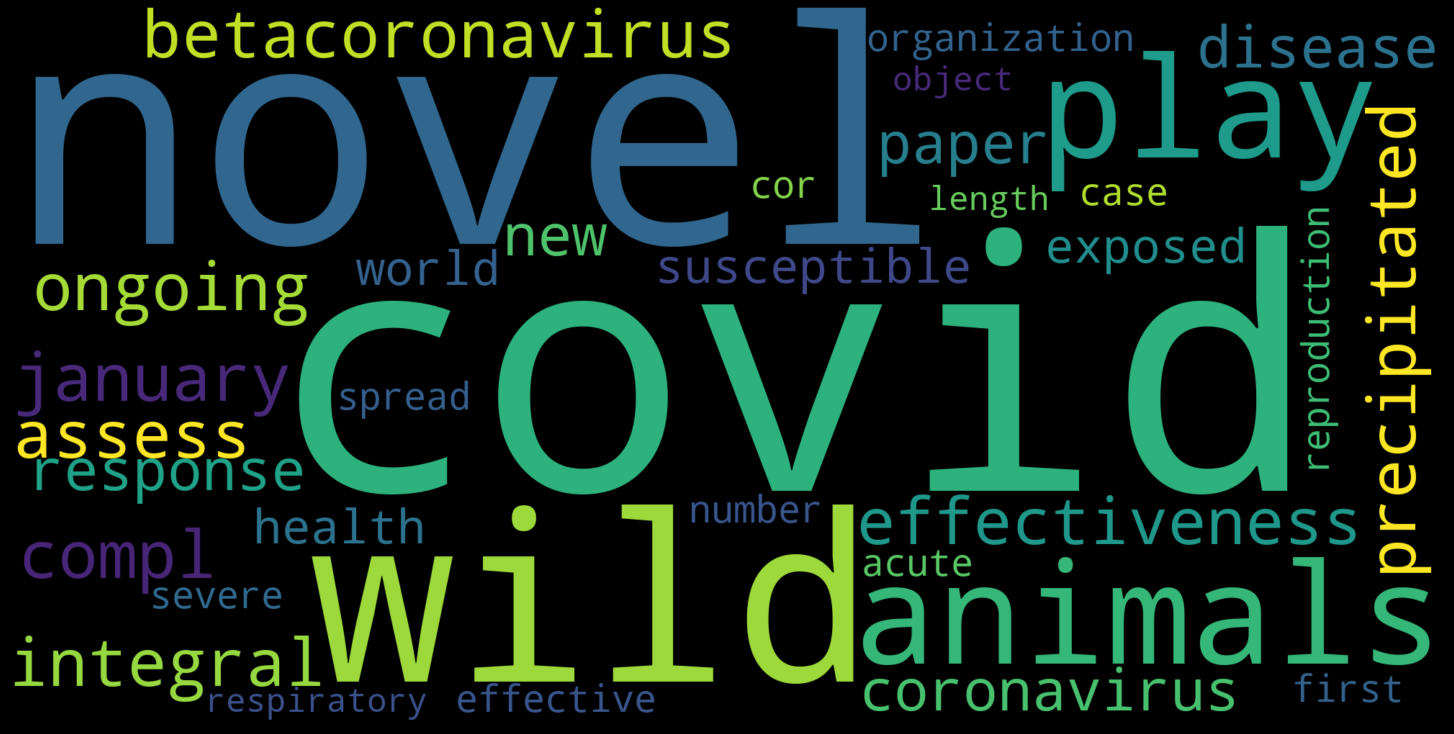

In [40]:
for char in symbols1:
        words2=pred['words'].replace(char,' ')
#lower case all words
words2=str(words2)
words2=words2.lower()

#ignore words
for item in ignoreThese:
        words2=words2.replace(item, ' ') 
        
wordcloud = WordCloud(
            width = 2000,
            height = 1000,
            background_color = 'black',
            stopwords = STOPWORDS).generate(words2)
fig = plt.figure(
    figsize = (20, 10),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### 8. Serial Interval (for infector-infectee pair)

In [41]:
SerialInt=COVID[COVID['abstract'].str.contains('virus evolve')]
SerialInt.shape

(1, 8)

In [42]:
SerialInt.head(3)

,title,publish_time,journal,url,abstract,doi,cord_uid,words
125282,Flattening the curves: on-off lock-down strate...,2020-04-15,NaN,https://arxiv.org/pdf/2004.06916v1.pdf,The current COVID-19 pandemic is affecting dif...,NaN,zhcamsqa,"[The, current, COVID, 19, pandemic, is, affect..."


In [43]:
SerialInt.to_csv('ArticleAbstracts_COVID_Serial_Interval.csv')

#### 9. Qualitative assessment frameworks 

In [44]:
Qual=Articles1[Articles1['abstract'].str.contains('qualitative')]
Qual.shape

(1569, 8)

In [45]:
QFrame=Qual[Qual['abstract'].str.contains('framework')]
QFrame.shape

(128, 8)

In [46]:
QFrame.to_csv('ArticleAbstracts_Qualitative_Framework.csv')